In [1]:
import pickle
import matplotlib.pyplot as plt
from tct.tct_elastic import tct_elastic_predictor_error_comparison
from misc.plotting import format_vectors_from_flat, create_mesh_animation

In [2]:
with open("results/model_v3.pkl", "rb") as f:
    predictor = pickle.load(f)

In [ ]:
mesh_pred, u_pred, v_pred, mesh_real, u_real, v_real, error, bottom_half_nodes = tct_elastic_predictor_error_comparison(predictor)

[██████████████████████████████████████████████████] 2000/2000

Simulation complete


In [4]:
u_tensor_pred = format_vectors_from_flat(u_pred)
v_tensor_pred = format_vectors_from_flat(v_pred)
u_tensor_real = format_vectors_from_flat(u_real)
v_tensor_real = format_vectors_from_flat(v_real)

In [ ]:
with open("sim_results_error_v3.pkl", "wb") as f:
    pickle.dump((mesh_pred, u_tensor_pred, v_tensor_pred, mesh_real, u_tensor_real, v_tensor_real, error, bottom_half_nodes), f)

In [ ]:
with open("sim_results_error_v3.pkl", "rb") as f:
    mesh_pred, u_tensor_pred, v_tensor_pred, mesh_real, u_tensor_real, v_tensor_real, error, bottom_half_nodes = pickle.load(f)

In [7]:
create_mesh_animation(mesh_pred, u_tensor_pred[:, :, 1], u_tensor_pred, name="comparison_prediction")

error: XDG_RUNTIME_DIR is invalid or not set in the environment.
MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen


In [8]:
create_mesh_animation(mesh_real, u_tensor_real[:, :, 1], u_tensor_real, name="comparison_real")

error: XDG_RUNTIME_DIR is invalid or not set in the environment.
MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen


In [ ]:
create_mesh_animation(mesh_pred, u_tensor_pred[:, :, 1] - u_tensor_real[:, bottom_half_nodes, 1], u_tensor_pred, name="comparison_error")

ValueError: operands could not be broadcast together with shapes (20,126) (20,231) 

In [13]:
error_mean = [abs(e).mean() for e in error]

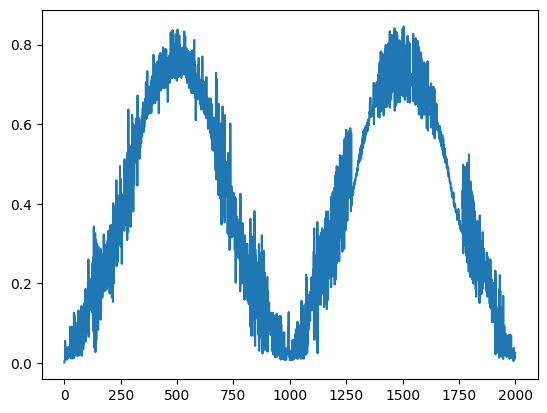

In [14]:
plt.plot(error_mean)
plt.show()